# Solving Frozen Lake Problem Using Value Iteration

## Goal:

Imagine, there is a frozen lake from your home to office, you should walk on the frozen lake
to reach your office. But oops! there will be a hole in the frozen lake in between, so you have
to be careful while walking in the frozen lake to avoid getting trapped at holes.
Look at the below figure where, 

1. S is the starting position (Home)
2. F is the Frozen lake where you can walk
3. H is the Hole which you have to be so careful about
4. G is the Goal (office)


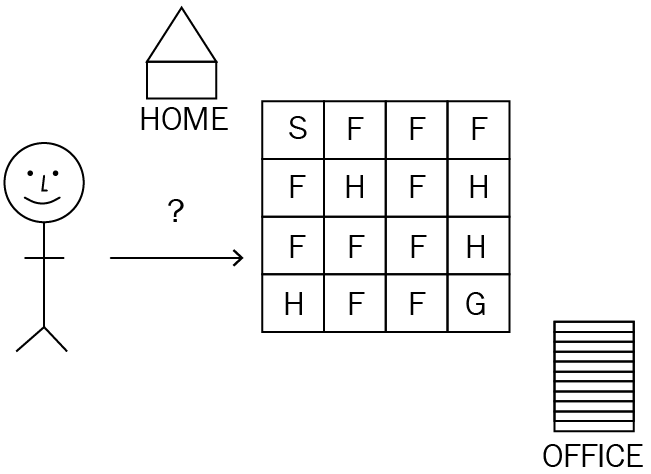

 Okay, now let us use our agent instead of you to find the correct way to reach the office.
The agent goal is to find the optimal path to reach from S to G without getting trapped at H.
How an agent can achieve this? We give +1 point as a reward to the agent if it correctly
walks on the frozen lake and 0 points if it falls into the hole. So that agent could determine
which is the right action. An agent will now try to find the optimal policy. Optimal policy
implies taking the correct path which maximizes the agent reward. If the agent is
maximizing the reward, apparently agent is learning to skip the hole and reach the
destination.

First, we import necessary libraries

In [1]:
import gym
import numpy as np

Initialize our gym environment

In [2]:
env = gym.make('FrozenLake-v0')

 Let us see how the environment looks like

In [3]:
env.render()


SFFF
FHFH
FFFH
HFFG


Now we define the function called value_iteration which performs value iteraion i.e it returns the optimal value
function (value table).

In [4]:
def value_iteration(env, gamma = 1.0):
    
    # initialize value table with zeros
    value_table = np.zeros(env.observation_space.n)
    
    # set number of iterations and threshold
    no_of_iterations = 100000
    threshold = 1e-20
    
    for i in range(no_of_iterations):
        
        # On each iteration, copy the value table to the updated_value_table
        updated_value_table = np.copy(value_table) 
        
        # Now we calculate Q Value for each actions in the state 
        # and update the value of a state with maximum Q value
        
        for state in range(env.observation_space.n):
            Q_value = []
            for action in range(env.action_space.n):
                next_states_rewards = []
                for next_sr in env.P[state][action]: 
                    trans_prob, next_state, reward_prob, _ = next_sr 
                    next_states_rewards.append((trans_prob * (reward_prob + gamma * updated_value_table[next_state]))) 
                
                Q_value.append(np.sum(next_states_rewards))
                
            value_table[state] = max(Q_value) 
            
        # we will check whether we have reached the convergence i.e whether the difference 
        # between our value table and updated value table is very small. But how do we know it is very
        # small? We set some threshold and then we will see if the difference is less
        # than our threshold, if it is less, we break the loop and return the value function as optimal
        # value function
        
        if (np.sum(np.fabs(updated_value_table - value_table)) <= threshold):
             print ('Value-iteration converged at iteration# %d.' %(i+1))
             break
    
    return value_table

 Now, we define a function called extract policy for extracting optimal policy from the optimal value function. 
i.e We calculate Q value using our optimal value function and pick up
the actions which has the highest Q value for each state as the optimal policy.

In [5]:
def extract_policy(value_table, gamma = 1.0):
 
    # initialize the policy with zeros
    policy = np.zeros(env.observation_space.n) 
    
    
    for state in range(env.observation_space.n):
        
        # initialize the Q table for a state
        Q_table = np.zeros(env.action_space.n)
        
        # compute Q value for all ations in the state
        for action in range(env.action_space.n):
            for next_sr in env.P[state][action]: 
                trans_prob, next_state, reward_prob, _ = next_sr 
                Q_table[action] += (trans_prob * (reward_prob + gamma * value_table[next_state]))
        
        # select the action which has maximum Q value as an optimal action of the state
        policy[state] = np.argmax(Q_table)
    
    return policy

First, We compute the optimal value function

In [6]:
optimal_value_function = value_iteration(env=env,gamma=1.0)

Value-iteration converged at iteration# 1373.


and we derive the optimal policy from the optimal value function

In [7]:
optimal_policy = extract_policy(optimal_value_function, gamma=1.0)

In [8]:
print(optimal_policy)

[0. 3. 3. 3. 0. 0. 0. 0. 3. 1. 0. 0. 0. 2. 1. 0.]
